In [ ]:
#Etapa 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# a) Carregar a base de dados
streaming_data = pd.read_csv("streaming_data.csv")

# b) Descrição estatística dos dados
print("Descrição estatística dos dados:")
print(streaming_data.describe())


Descrição estatística dos dados:
                Age  Time_on_platform  Devices_connected  \
count  66607.000000      56464.000000       52696.000000   
mean      43.511072       4385.848505           2.995370   
std       15.043158       2526.580859           1.414072   
min       18.000000          0.000000           1.000000   
25%       30.000000       2196.000000           2.000000   
50%       43.000000       4384.000000           3.000000   
75%       57.000000       6573.000000           4.000000   
max       69.000000       8759.000000           5.000000   

       Num_streaming_services  Num_active_profiles    Avg_rating       Churned  
count             9572.000000         77884.000000  60614.000000  61148.000000  
mean                 2.496239             3.002273      3.002252      0.243066  
std                  1.120700             1.413235      1.154963      0.428938  
min                  1.000000             1.000000      1.000000      0.000000  
25%                  

In [ ]:
# c) Verificar os tipos de dados
print("\nTipos de dados:")
print(streaming_data.dtypes)



Tipos de dados:
Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object


In [ ]:
# d) Quantidade de valores faltantes
print("\nQuantidade de valores faltantes:")
print(streaming_data.isna().sum())


Quantidade de valores faltantes:
Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


In [ ]:
# Etapa 02
# Substituir valores NaN por 0
cols_to_fillna = ["Time_on_platform", "Num_streaming_services", "Avg_rating", "Devices_connected"]
streaming_data[cols_to_fillna] = streaming_data[cols_to_fillna].fillna(0)


In [ ]:
# Dropar linhas nulas nas colunas Gender, Subscription_type e Age
streaming_data.dropna(subset=["Gender", "Subscription_type", "Age"], inplace=True)

In [ ]:
# Transformar valores churned 0 e 1 por No e Yes
streaming_data["Churned"] = streaming_data["Churned"].replace({0: "No", 1: "Yes"})

In [ ]:
# Remover linhas com valores nulos
streaming_data.dropna(inplace=True)

In [ ]:
# Etapa 03
# Definir X e y
X = streaming_data.drop(columns=["Churned"])  # Features
y = streaming_data["Churned"]  # Target variable

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Codificar variáveis
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=['object'])))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Dividir os dados codificados em conjunto de treinamento e teste
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão logística com os dados codificados
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_encoded, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Definir variáveis categóricas e numéricas
categorical_features = ["Gender", "Subscription_type"]
numerical_features = ["Time_on_platform", "Num_streaming_services", "Avg_rating", "Devices_connected"]

In [ ]:
# Codificar variáveis categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(streaming_data[categorical_features])
X_encoded = encoder.transform(streaming_data[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Dividir os dados em conjunto de treinamento e teste
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, streaming_data["Churned"], test_size=0.2, random_state=42)

In [ ]:
# Obter índices correspondentes para os dados numéricos
train_indices = np.arange(len(X_train_encoded))
test_indices = np.arange(len(X_test_encoded))

In [ ]:
# Obter dados numéricos correspondentes aos índices
X_train_numerical = streaming_data.iloc[train_indices][numerical_features].values
X_test_numerical = streaming_data.iloc[test_indices][numerical_features].values


In [ ]:
# Concatenar variáveis codificadas com variáveis numéricas
X_train_final = np.concatenate([X_train_encoded, X_train_numerical], axis=1)
X_test_final = np.concatenate([X_test_encoded, X_test_numerical], axis=1)


In [ ]:
# Treinar o modelo de regressão logística
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_final, y_train)

LogisticRegression()

In [ ]:
# Fazer previsões usando o modelo treinado
y_pred = log_reg_model.predict(X_test_final)

In [ ]:
# Avaliar o modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7502175805047868


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Definir variáveis X e y para o modelo
X = streaming_data.drop(columns=["Churned"])
y = streaming_data["Churned"]



In [ ]:
# Codificar variáveis categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=['object'])))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
# Realizar o .fit do modelo
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Realizar a modelagem
y_pred = log_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

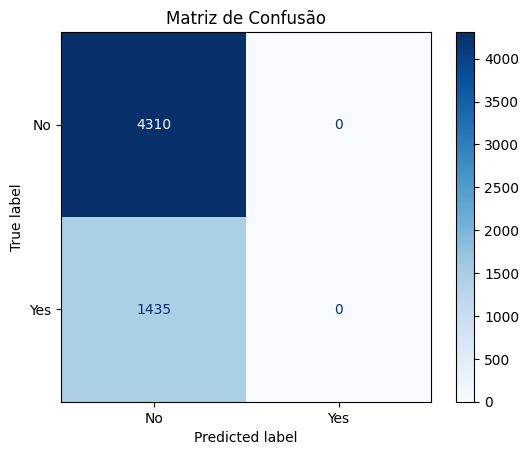

In [ ]:
# Plotar matrix confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


In [ ]:
# Printar métricas
accuracy = log_reg_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7502175805047868


In [ ]:
#Etapa 5
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2

# Carregar os dados
streaming_data = pd.read_csv("streaming_data.csv")

# Tratamento dos dados
streaming_data.dropna(subset=["Gender", "Subscription_type", "Age"], inplace=True)
streaming_data["Churned"] = streaming_data["Churned"].replace({0: "No", 1: "Yes"})
streaming_data.dropna(inplace=True)

# Definir features e target
X = streaming_data.drop(columns=["Churned"])
y = streaming_data["Churned"]


In [ ]:
# Codificar variáveis categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
# Selecionar as melhores features usando chi-quadrado
selector = SelectKBest(score_func=chi2, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Inicializar o modelo Random Forest
rf_model = RandomForestClassifier()

In [ ]:
# Ajustar o modelo aos dados de treinamento
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier()

In [ ]:
# Realizar previsões nos dados de teste
X_test_selected = selector.transform(X_test)
y_pred = rf_model.predict(X_test_selected)


In [ ]:
# Avaliar o modelo
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Imprimir resultados
print("Matriz de Confusão:")
print(conf_matrix)
print("\nAcurácia:", accuracy)
print("\nRelatório de Classificação:")
print(classification_rep)


Matriz de Confusão:
[[182  29]
 [ 42  34]]

Acurácia: 0.7526132404181185

Relatório de Classificação:
              precision    recall  f1-score   support

          No       0.81      0.86      0.84       211
         Yes       0.54      0.45      0.49        76

    accuracy                           0.75       287
   macro avg       0.68      0.65      0.66       287
weighted avg       0.74      0.75      0.74       287

